In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\13_week\AAME.csv"
df = pd.read_csv(file_path)

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [11]:
features = ['Open', 'High', 'Low', 'Close']
data = df[features].to_numpy()

In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [16]:
def make_sequence(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size][-1])  # 다음날 Close (마지막 열)
    return np.array(X), np.array(y)

window_size = 5
X, y = make_sequence(scaled_data, window_size)

In [18]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [20]:
model = Sequential([
    Input(shape=(window_size, len(features))),
    SimpleRNN(64, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

Epoch 1/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0131 - val_loss: 2.6266e-05
Epoch 2/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1992e-04 - val_loss: 2.3861e-05
Epoch 3/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2532e-04 - val_loss: 2.2130e-05
Epoch 4/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3741e-04 - val_loss: 2.1789e-05
Epoch 5/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3525e-04 - val_loss: 2.7897e-05
Epoch 6/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4548e-04 - val_loss: 3.6726e-05
Epoch 7/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2325e-04 - val_loss: 2.0994e-05
Epoch 8/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2982e-04 - val_loss: 6.8069e-05
Epoch 9/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1927e-04 - val_loss: 2.0579e-05
Epoch 10/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2685e-04 - val_loss: 2.0864e-05
Epoch 11/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.

In [21]:
y_pred = model.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [31]:
def inverse_close(scaled_close):
    dummy = np.zeros((len(scaled_close), len(features)))  # features = 4
    dummy[:, -1] = scaled_close.reshape(-1)               # 마지막 열에 Close만
    return scaler.inverse_transform(dummy)[:, -1]

In [33]:
y_test_inv = inverse_close(y_test)
y_pred_inv = inverse_close(y_pred)

In [35]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"\n✅ RNN Test MSE: {mse:.4f}")


✅ RNN Test MSE: 0.0103


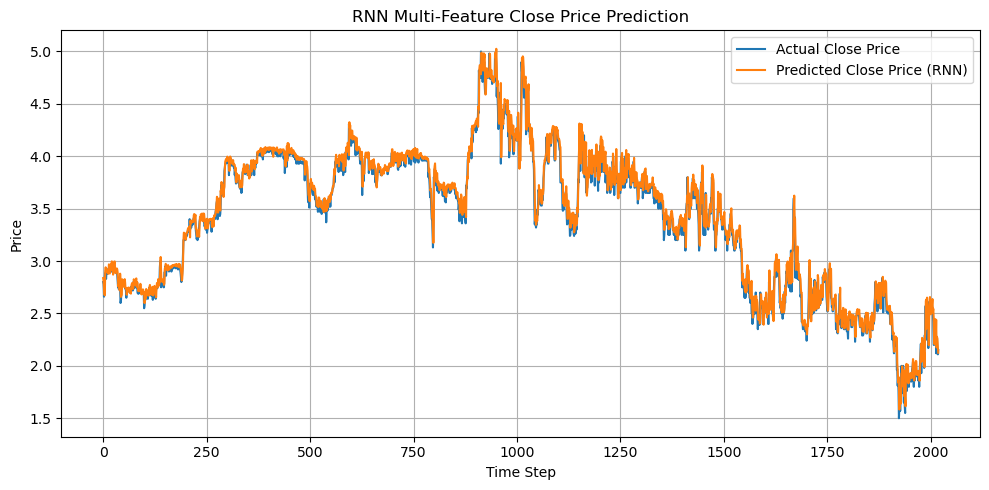

In [37]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price (RNN)')
plt.title('RNN Multi-Feature Close Price Prediction')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()